**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients. (Total 30 marks)

# Install the necessary libraries (1 mark)


In [35]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn import metrics

import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

from matplotlib import pyplot as plt

# import data 2C_weka.csv for 2 Class Classifcation. (1 mark)


In [36]:
TwoC_weka_df=pd.read_csv("2Classdata.csv")
TwoC_weka_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


# Explore the data set.Get necessary information about the data. (4 marks)

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [37]:
TwoC_weka_df.head()

##all numeric columns except class.that seems  to be our target variable.

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [38]:
TwoC_weka_df.tail()   

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [39]:
print(TwoC_weka_df.shape)
TwoC_weka_df.isna().count()  ## Each column have 310 entries so no mising values in given data set

(310, 7)


pelvic_incidence            310
pelvic_tilt numeric         310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
class                       310
dtype: int64

In [40]:
TwoC_weka_df["class"].unique()    # there are two possible classes Abnormal and Normal

array(['Abnormal', 'Normal'], dtype=object)

In [41]:
TwoC_weka_df.describe()  # The skewness of data can be seen for degree_spondylolisthesis

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [42]:
## We can infer, from above that "degree_spondylolisthesis"  is highly skewed as mean is way larger than the median(central Value).
## "lumbar_lordosis_angle", however is moderatly skewed.Other parameters are almost uniformly distributed.

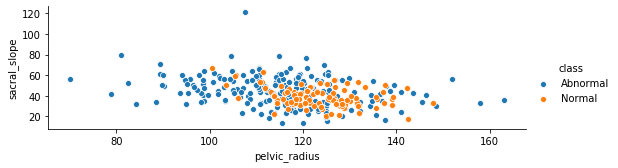

In [43]:
TwoC_weka_df.columns
sns.pairplot(x_vars="pelvic_radius",y_vars="sacral_slope", data=TwoC_weka_df,hue="class",aspect=3)

## few clear inferences :
## The distribution of sacral_slope and pelvic_radius shows that class is Abnormal for lower values of sacral_slope(0-60).
## similarly, for pelvic_radius, the "normal" class mostly lies between 100 to 140.

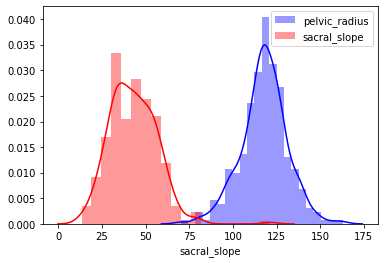

In [44]:
sns.distplot(TwoC_weka_df.pelvic_radius,color="blue", label="pelvic_radius")
sns.distplot(TwoC_weka_df.sacral_slope,color="red", label="sacral_slope")
plt.legend()

In [11]:
## A quick inference from above is that sacral_slope is left skewed, however the pelvic_radius is uniformly distributed.

# Encode the Class variable to integer. (2 marks)

In [45]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()  
## since the target variable have 2 values (Abnormal,normal), we can choose label encoder

In [46]:
TwoC_weka_df['class'] = class_label_encoder.fit_transform(TwoC_weka_df['class'])
TwoC_weka_df['class'].dtype        ## Class variable is now of type Integer

dtype('int32')

In [47]:
TwoC_weka_df.head() ## 0 encoded to Abnormal and 1-> Normal

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data. (2 marks)

In [48]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = TwoC_weka_df.drop(labels= "class" , axis = 1) 

# Capture the class values from the 'class' column into a pandas series akin to array 
y = TwoC_weka_df[["class"]]


# Normalize your Data (X) to get values between 0 to 1. (2 marks)

In [49]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() 
min_max_scaler   ## Min miax scaler  by default normalizes the data in range 0 to 1

MinMaxScaler(copy=True, feature_range=(0, 1))

In [50]:
X_minmax = min_max_scaler.fit_transform(X)

In [51]:
print('max is',X_minmax.max())
print('min is',X_minmax.min())

max is 1.0
min is 0.0


# Split the dat as train and test with a ratio of 70:30. (2 marks)

In [52]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [54]:
X_train.shape

(217, 6)

In [55]:
X_test.shape

(93, 6)

# Build the KNN model using Train Dataset and predict the class on test dataset. (2 marks)

In [56]:
KNN = KNeighborsClassifier()
# Call Nearest Neighbour algorithm
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels = KNN.predict(X_test)


In [58]:
predicted_labels   ## predicted value of class variable for test data using KNN classifier

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0])

In [59]:
## Train Accuracy
KNN.score(X_train, y_train)

0.8847926267281107

# Calculate the performance score of of your classification on test dataset. (2 marks)
Hint- You can use knn.score( ) function.

In [60]:
## Test Accuracy
KNN.score(X_test,y_test)

0.8817204301075269

# What is the best K value for your classifcation?
#Find at which k value you get the best score. (2 marks)

In [61]:
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
maxK = int(np.sqrt(X_train.shape[0]))
print(maxK)

14


In [62]:
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, list(range(1,16))))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())
    print('value for k= ' , k,',score=',scores.mean())
    

value for k=  1 ,score= 0.8479442745497792
value for k=  3 ,score= 0.8156218144750256
value for k=  5 ,score= 0.8017753992524634
value for k=  7 ,score= 0.8157067618076792
value for k=  9 ,score= 0.8431872239211688
value for k=  11 ,score= 0.8386850152905199
value for k=  13 ,score= 0.8524464831804281
value for k=  15 ,score= 0.8432721712538227


In [63]:
# changing to misclassification error
misError = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[misError.index(min(misError))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


In [64]:
KNN = KNeighborsClassifier(n_neighbors=optimal_k)
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

0.8817204301075269

In [65]:
# Confusion matrix
metrics.confusion_matrix(y_test, KNN.predict(X_test))

array([[57,  2],
       [ 9, 25]], dtype=int64)

In [67]:
## Train Confusion Matrix
metrics.confusion_matrix(y_train, KNN.predict(X_train))

array([[135,  16],
       [ 17,  49]], dtype=int64)

In [ ]:
Actual/Our model Prediction == 0 ---> [135, 16]

Actual/Our model Prediction == 1 --> [ 49, 17]

Correct predictions: (135 + 49)

Wrong prediction: (17 + 16)

Error rate: (17+16)/217

Accuracy: (135 + 49)/217

k= [1, 3, 5, 7, 9, 11, 13, 15] ;cv_scores= [0.8479442745497792, 0.8156218144750256, 0.8017753992524634, 0.8157067618076792, 0.8431872239211688, 0.8386850152905199, 0.8524464831804281, 0.8432721712538227]


Text(0, 0.5, 'Testing Accuracy')

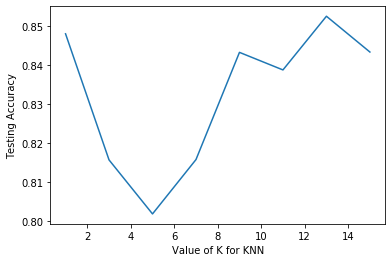

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

print('k=',neighbors,';cv_scores=',cv_scores)
plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## accuracy for test is found max at k =13 from plot below

In [69]:
## Hence a performance score of 0.8817204301075269 is achieved at k =13 (Optimal k value),
## However, we saw that with no calculation using std KNN, 
## (i.e.at output 132 above)
## KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
##                     metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform') 
##gave the same result after tuning the certain aparamters.

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above. (10 marks)

In [70]:
ThreeCData_df=pd.read_csv("3Classdata.csv")
ThreeCData_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [71]:
ThreeCData_df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [72]:
ThreeCData_df.info()   ## no missing value , all data entries have numeric data type except class the target variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [73]:
ThreeCData_df.describe()  
## high skewed parameters ->degree_spondylolisthesis,
##Moderately skewed ->lumbar_lordosis_angle,pelvic_incidence

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [74]:
ThreeCData_df.isna().sum()  ## no missing value found in the dataset

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

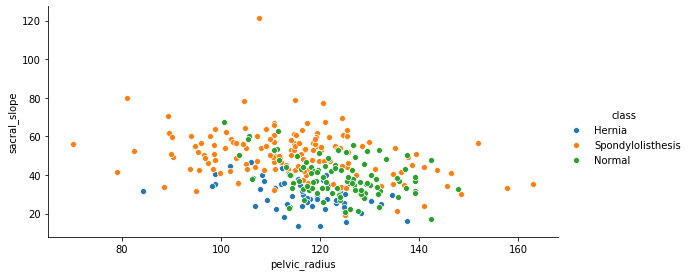

In [75]:
ThreeCData_df.columns
sns.pairplot(x_vars="pelvic_radius",y_vars="sacral_slope", data=ThreeCData_df,hue="class",aspect=2,height=4)

## the patients classified as Hernia, have lower value(0-50) of sacral_slope,however for its higher value (>50 approx) more of
## abnormal cases has been of Spondylolisthesis.

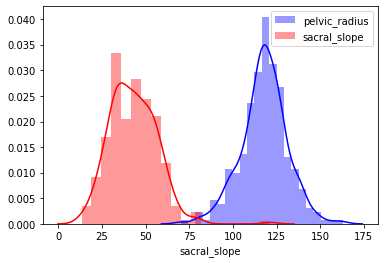

In [76]:
sns.distplot(ThreeCData_df.pelvic_radius,color="blue", label="pelvic_radius")
sns.distplot(ThreeCData_df.sacral_slope,color="red", label="sacral_slope")
plt.legend()
## A quick inference from above is that sacral_slope is left skewed, however the pelvic_radius is uniformly distributed.

In [77]:
class_label_encoder = LabelEncoder()  
## since the target variable have 2 values (Abnormal,normal), we can choose label encoder

ThreeCData_df['class'] = class_label_encoder.fit_transform(ThreeCData_df['class'])
ThreeCData_df['class'].dtype        ## Class variable is now of type Integer
ThreeCData_df.head() ## 0 encoded to Abnormal and 1-> Normal

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [78]:
ThreeCData_df["class"].unique()  ## label encoded to 0,1,2

array([0, 2, 1], dtype=int64)

In [80]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = ThreeCData_df.drop(labels= "class" , axis = 1) 

# Capture the class values from the 'class' column into a pandas series akin to array 
y = ThreeCData_df[["class"]]

In [81]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() 
min_max_scaler   ## Min miax scaler  by default normalizes the data in range 0 to 1

X_minmax = min_max_scaler.fit_transform(X)

In [82]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train.shape

(217, 6)

In [83]:
X_test.shape

(93, 6)

In [84]:
KNN = KNeighborsClassifier()
# Call Nearest Neighbour algorithm
KNN.fit(X_train, y_train)

# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels = KNN.predict(X_test)

In [85]:
## Train Accuracy
print('train score ',KNN.score(X_train, y_train))

## Test Accuracy
print('Test score ',KNN.score(X_test,y_test))

train score  0.8755760368663594
Test score  0.8709677419354839


In [86]:
maxK = int(np.sqrt(X_train.shape[0]))
print(maxK)

14


In [87]:
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, list(range(1,16))))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())
    print('value for k= ' , k,',score=',scores.mean())
    

# changing to misclassification error
misError = [1 - x for x in cv_scores]

value for k=  1 ,score= 0.8248810737342848
value for k=  3 ,score= 0.8064050288820931
value for k=  5 ,score= 0.7879714576962283
value for k=  7 ,score= 0.7972731906218145
value for k=  9 ,score= 0.8247536527353041
value for k=  11 ,score= 0.8294257560312606
value for k=  13 ,score= 0.8432296975874958
value for k=  15 ,score= 0.8340129119945634


In [88]:
# determining best k
optimal_k = neighbors[misError.index(min(misError))]
print("The optimal number of neighbors is %d" % optimal_k)

KNN = KNeighborsClassifier(n_neighbors=optimal_k)
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

The optimal number of neighbors is 13


0.8602150537634409

In [89]:
# Confusion matrix
metrics.confusion_matrix(y_test, KNN.predict(X_test))

array([[ 7,  3,  1],
       [ 7, 25,  2],
       [ 0,  0, 48]], dtype=int64)

In [91]:
## Train Confusion Matrix
metrics.confusion_matrix(y_train, KNN.predict(X_train))

array([[37, 12,  0],
       [14, 50,  2],
       [ 2,  4, 96]], dtype=int64)

In [92]:
## This accuracy shows that adding third category in class teh accuracy of model somehow reduced from 88 % to 86%.

k= [1, 3, 5, 7, 9, 11, 13, 15] ;cv_scores= [0.8248810737342848, 0.8064050288820931, 0.7879714576962283, 0.7972731906218145, 0.8247536527353041, 0.8294257560312606, 0.8432296975874958, 0.8340129119945634]


Text(0, 0.5, 'Testing Accuracy')

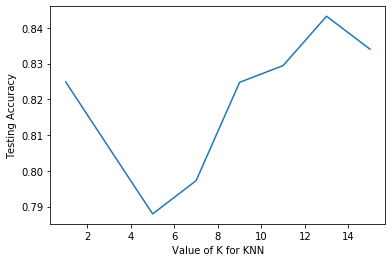

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

print('k=',neighbors,';cv_scores=',cv_scores)
plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
## accuracy is best at k =13